# Задача №5 – Визуализация данных, зависимостей между признаками и целевой переменной

Написать программу на Python, которая __визуализирует ряд зависимостей между признаками и целевыми переменными__ в нижеперечисленных вариациях.

1. Выбрать признак с неким распределением значений, и отобразить это распределение с помощью гистограмм и с помощью графика нормального распределения. 
2. Отобразить распределение значений нескольких признаков одновременно (subplots/pairplot).
3. Выбрать часть признаков датасета и отобразить корреляцию между ними в виде тепловой карты (heatmap). После этого построить тепловую карту, которые будут отображать лишь высокие значения прямой и обратной корреляции. 
4. Выбрать признак (имеющий некое распределение значений), целевую переменную (категориальную) и отобразить для них график размаха (ящик с усами, box plot). 
5. Выбрать целевую переменную и категориальный признак. 

__Произвести группировку значений целевой переменной по категориям признака, и отобразить полученные значения на графике.__ Проанализировать датасеты, разобранные на предыдущих лабораторных работах __(Brooklyn sales map, recs2009_public, лесные пожары, качество вина или аренда велосипедов, двигатели машин).__ Выбрать конкретный датасет и признаки вы можете по желанию, но они должны быть информативными (т.е. графики должны иллюстрировать какие-то наглядные зависимости) и избегайте повторов сочетаний задание/датасет/признаки в пределах группы. Напишите короткий отчет по работе, включив в него программу с комментариями и построенными графиками.


In [1]:
import numpy as np
import pandas as pd

In [2]:
data =pd.read_csv('winequality-red.csv', sep=';')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
data.shape

(1599, 12)

In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Пропуски в данных отсутствуют

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

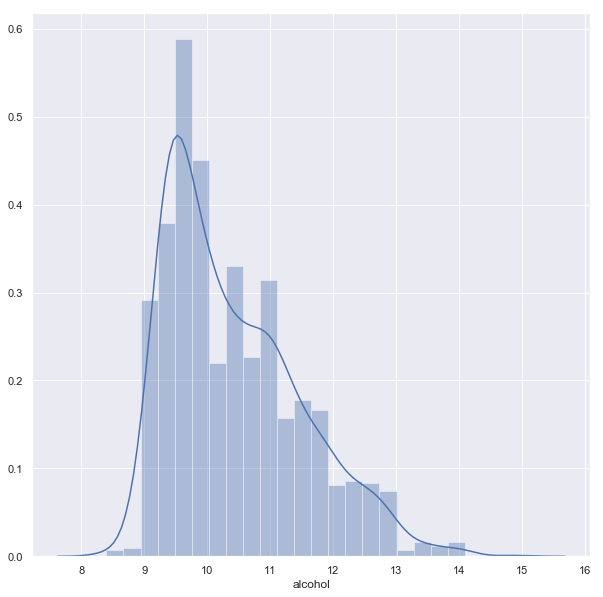

In [12]:
from scipy import stats
from  scipy.stats import expon, norm

sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(data['alcohol'])#, bins=10


Видно, что данный параметр скошены вправо, и есть некоторые выбросы выше ~15.

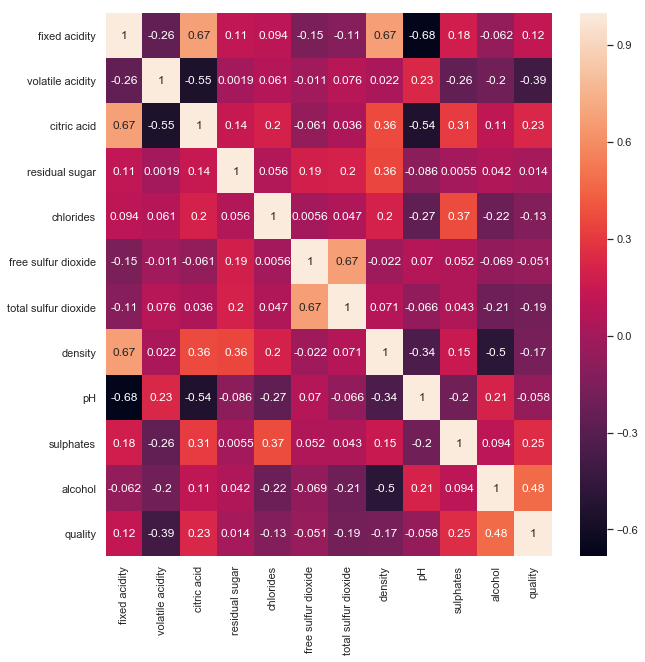

In [13]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data.corr(), cbar=True, annot=True)

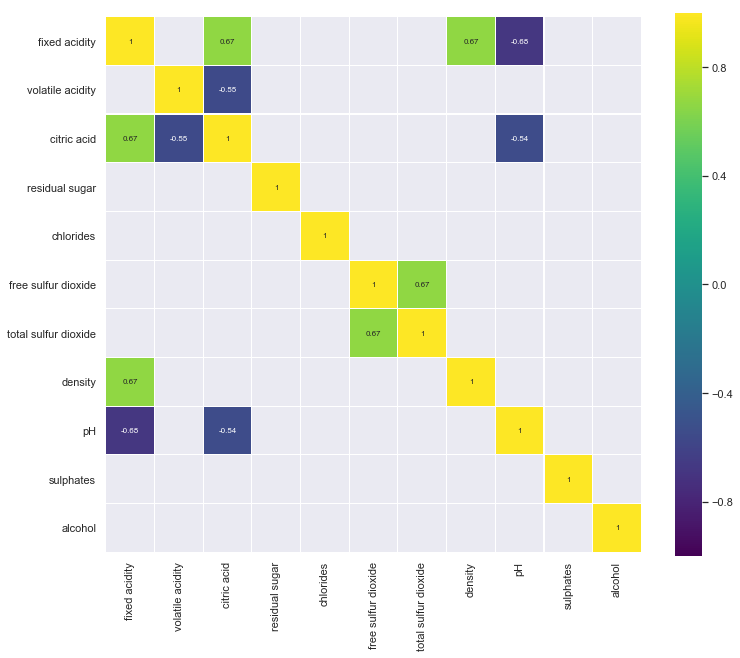

In [15]:
corr = data.drop('quality', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Большинство признаков не коррелируют между собой. Следовательно при построении модели можно включить все признаки.

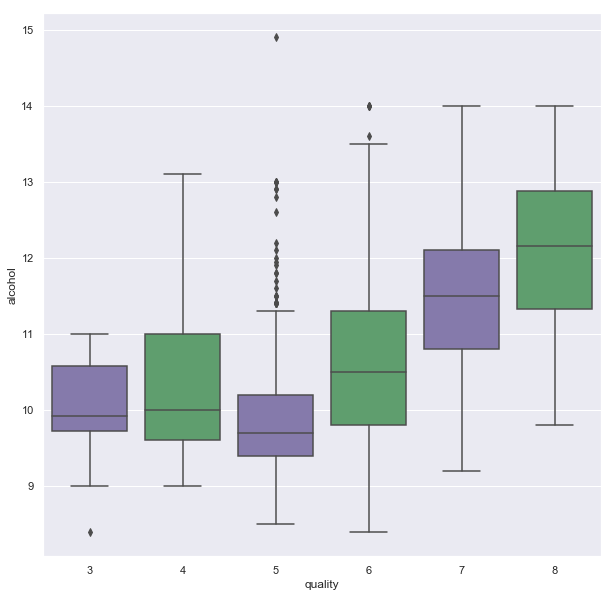

In [28]:
sns.set(rc={'figure.figsize':(10,10)})

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="quality", y="alcohol", palette=["m", "g"],
            data=data)

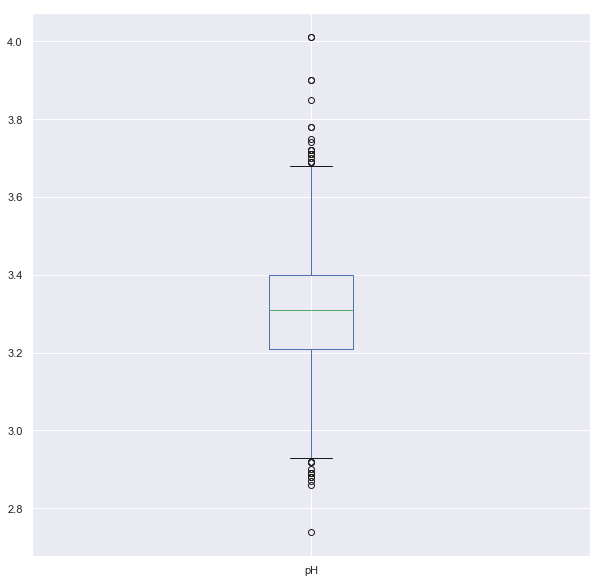

In [29]:
data['pH'].plot(kind='box')
plt.show()

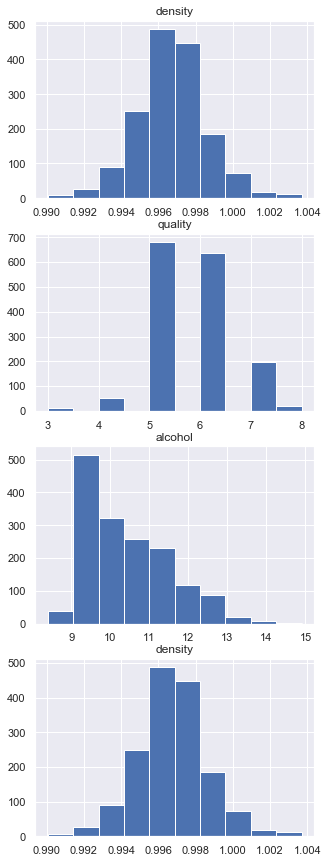

In [15]:
fig, axs = plt.subplots(4, figsize=(5, 15))
cat_columns = ['density', 'quality', 'alcohol', 'density']
for i in range(len(cat_columns)):
    axs[i].title.set_text(cat_columns[i])
    data[cat_columns[i]].hist(ax=axs[i])

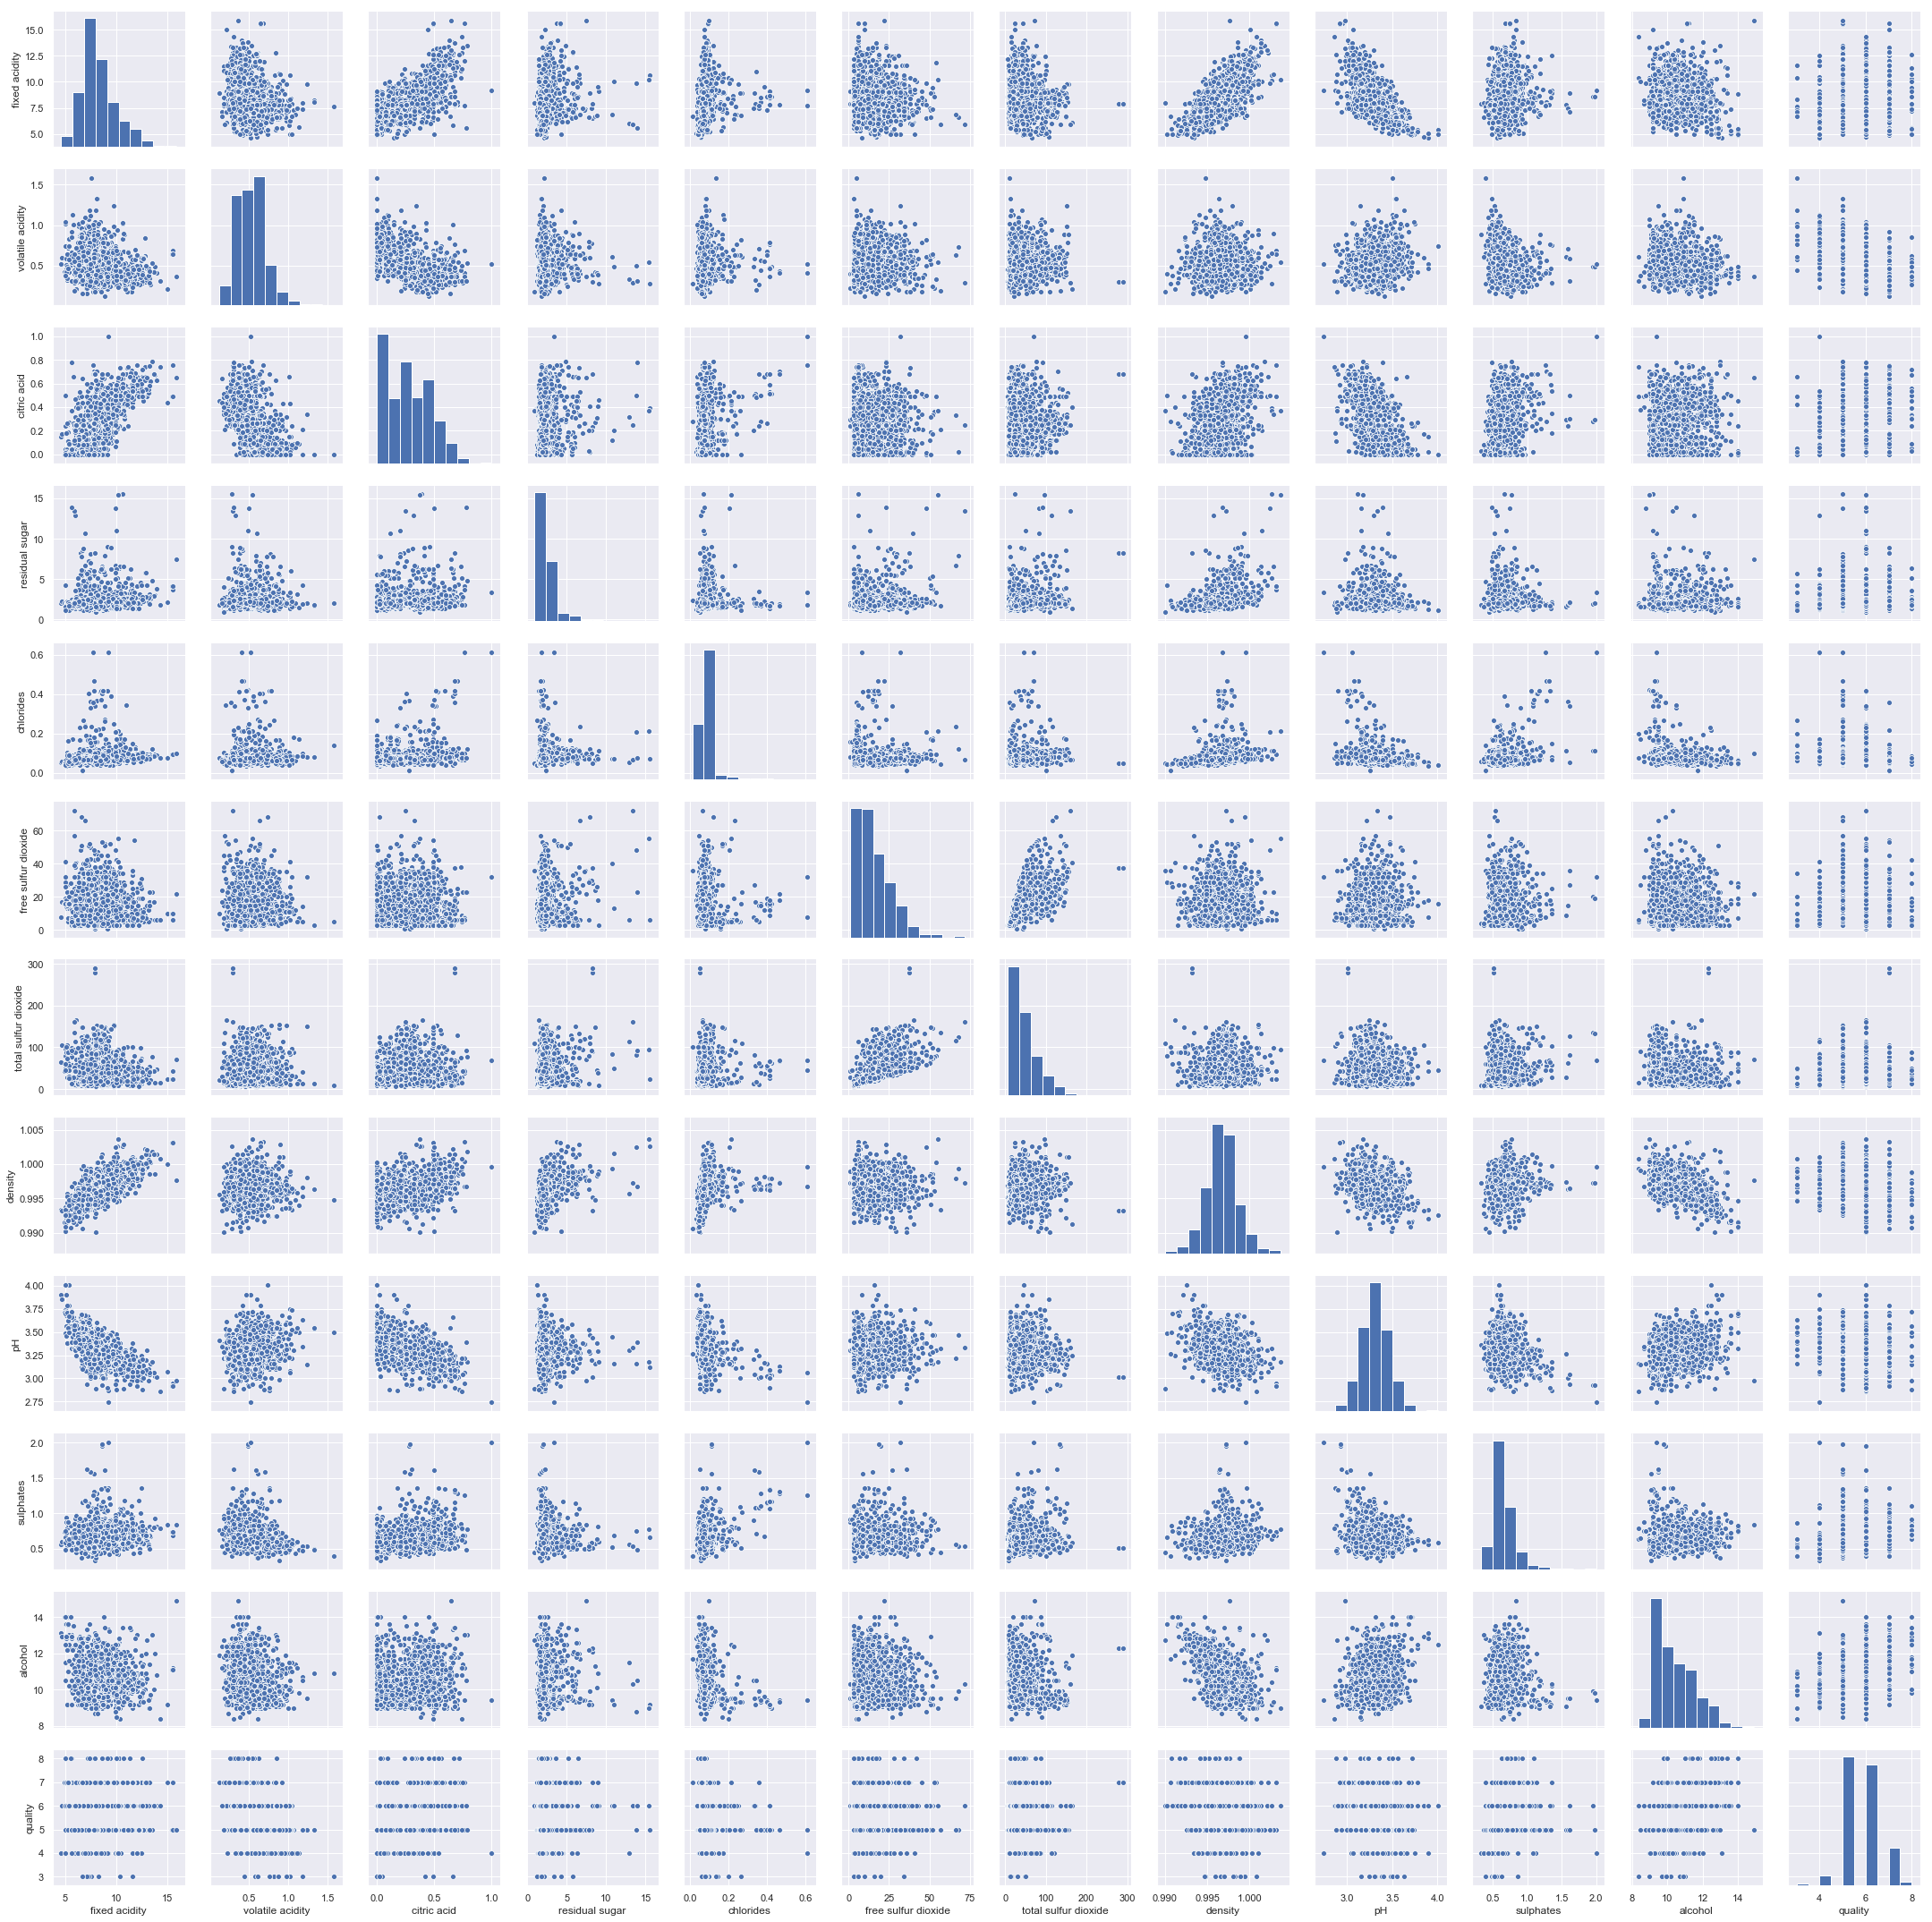

In [21]:
sns.pairplot(data)

Text(0.5,1,'Количество вина крепостью 10 по классам качества')

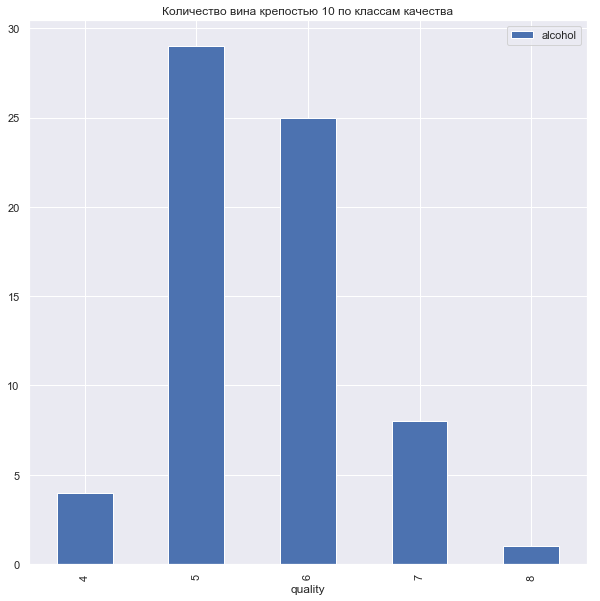

In [34]:
quality_wine = data[data.alcohol == 10]
icu = quality_wine.groupby('quality').count()
icu.plot(kind='bar',y='alcohol')
plt.title('Количество вина крепостью 10 по классам качества')

## Вывод:

В ходе выполнения работы была написана программа на Python, которая __визуализирует ряд зависимостей между признаками и целевыми переменными__. В качестве датасета для анализа был выбран  __качество вина (https://archive.ics.uci.edu/ml/datasets/Wine+Quality)__ 


